# 手机销量预测模型的构建与评估

#### 一、编程前的准备工作

1.配置好相应的python环境。

2.准备好需要处理的数据。

#### 二、导入数据集

1. 使用pd.read_csv函数将数据集读取到phone_data中：数据集相对目录：/data/shixunfiles/4e8c7513a833bbb84561d227eb6f7588_1592216699328.csv

2. 重新设置索引（index）：DataFrame存储为csv file后原来的索引（列名：‘Unnamed: 0’）会变为一个普通列（不再具备索引功能），因此需要将其重新设置为索引。可以使用set_index方法进行设置

In [1]:
#导入numpy,pandas库，用于读取csv文件，并对所读取的数据进行处理
import pandas as pd
import numpy as np
#读取数据集到phone_data中
phone_data=pd.read_csv('/data/shixunfiles/4e8c7513a833bbb84561d227eb6f7588_1592216699328.csv')
#将第一列'Unnamed: 0'重新设置为索引
phone_data=phone_data.set_index(['Unnamed: 0'])

#### 三、数据概览

1.查看数据集前十列数据：可以使用head方法

注：数据集中使用NaN表示缺失值

数据集表中各列含义说明如下：

|  列名 |  类型 |  注释 |
| :------------: |  :------------: |  :------------: |
| Unnamed:0 |  char | 索引，id |
| CPU cores |  char |CPU核数   |
| CPU freq  |  char |CPU频率|
| CPU model  |  char |CPU型号|
| RAM  |  char |运行内存|
| ROM |  char |内存|
| SIM cards  |  char |SIM卡|
| brand  |  char |品牌|
| battery  |  int |电池容量|
| charging port |  char |充电插口类型|
| comments |  int |评论数|
| front camera |  char |前置摄像头像素|
| model |  char |模型|
| month |  char |上市月份|
| price |  int |价格|
| rear camera |  int |后置摄像头个数|
| rear camera specs |  char |后置摄像头规格|
| resolution |  int |解析度|
| screen material |  char |屏幕材质|
| screen size |  float |屏幕尺寸|
| weight |  int |重量|
| year |  char |上市年份|

注：数据集中使用NaN表示缺失值

In [4]:
#使用head()方法查看phone_data中前十列的数据
phone_data.head(10)

#### 四、数据清洗

1. 进行数据清洗前，先要了解数据集中数据的完整性情况：检查各列的缺失值情况

In [7]:
#导入copy库，用于对数据进行浅拷贝或者深拷贝
import copy

#为了不破坏phone_data中的数据，我们将phone_data浅拷贝赋值给data
data = copy.copy(phone_data)
#然后对data进行缺失值检查，可以使用isnull().sum()获取data中各列缺失值的总数，以此了解缺失值情况
data.isnull().sum()

2.对缺失值进行补全操作，以保证数据的完整性，方便后续数据分析和处理，下面是多种补全方法的演示，并采用饼状图绘制出他们对数据的影响。

In [10]:
#填充0
a = data.fillna(0)
#填充均值
b = data.fillna(data.mean())
#采用后面一个值来进行填充
c = data.fillna(method='bfill')

#需注意，当使用data.mean()等函数时，只会填充适用于可以执行该函数的列，也就是数值类型的列，非数值类型的不会被填充。

In [6]:
#导入matplotlib库，绘制图像
import matplotlib.pyplot as plt

#绘制a关于销量的饼状图

#使用groupby方法统计每个品牌评论总数，放到pie_plt中，以此作为我们对销量的统计
pie_plt=a.groupby(['brand']).sum()['comments'].sort_values(ascending=False) 
comment_sum=pie_plt.values.sum()
plt.figure(figsize=(10,10))  
percen=[np.round(each/comment_sum*100,2) for each in pie_plt.values]
plt.pie(pie_plt.values,labels=pie_plt.index,autopct="%3.1f%%") 
plt.legend([str(pie_plt.index[i])+': '+str(percen[i])+"%" for i in range(len(percen))],loc="upper right",bbox_to_anchor=(0.3, 0, 1, 1))  
plt.title("Proportion of mobile phone brand sales") 
plt.show()

In [7]:
#绘制b关于销量的饼状图

pie_plt=b.groupby(['brand']).sum()['comments'].sort_values(ascending=False) 
comment_sum=pie_plt.values.sum()
plt.figure(figsize=(10,10))  
percen=[np.round(each/comment_sum*100,2) for each in pie_plt.values]
plt.pie(pie_plt.values,labels=pie_plt.index,autopct="%3.1f%%") 
plt.legend([str(pie_plt.index[i])+': '+str(percen[i])+"%" for i in range(len(percen))],loc="upper right",bbox_to_anchor=(0.3, 0, 1, 1))  
plt.title("Proportion of mobile phone brand sales") 
plt.show()

In [8]:
#绘制c关于销量的饼状图

pie_plt=c.groupby(['brand']).sum()['comments'].sort_values(ascending=False) 
comment_sum=pie_plt.values.sum()
plt.figure(figsize=(10,10))  
percen=[np.round(each/comment_sum*100,2) for each in pie_plt.values]
plt.pie(pie_plt.values,labels=pie_plt.index,autopct="%3.1f%%") 
plt.legend([str(pie_plt.index[i])+': '+str(percen[i])+"%" for i in range(len(percen))],loc="upper right",bbox_to_anchor=(0.3, 0, 1, 1))  
plt.title("Proportion of mobile phone brand sales") 
plt.show()

这里我们选取0进行补全缺失值。

In [9]:
#使用fillna()方法用0补全缺失值
data.fillna(0, inplace=True)

#再次检查缺失值补全情况，查看是否有遗漏
#若操作正确，所有列的缺失值总数应该都为0，即表明没有缺失值了
data.isnull().sum()

#### 五、数据可视化

1.对选取的手机营销数据中的特征变量进行聚合处理，并使用图形化方式展示

1.1 手机的销量数据是手机营销最关注的信息之一，这里要求按照品牌对数据进行分类，然后聚合处理求取各个品牌的手机销量，并按照销量进行降序排列

因为phone_data存放的数据中没有销量数据，所以我们选取与销量有密切关联性的评论数当作销量进行处理，计算各个品牌手机的销量占比，并绘制图像展示占比结果

注意：因为刚才进行了缺失值补全，补充的'0'会对数据可视化有影响，因此这里建议使用原数据（即phone_data中的数据）进行可视化，可视化函数会自动忽略缺失值对可视化的影响

In [10]:
#使用groupby方法统计每个品牌评论总数，放到pie_plt中，以此作为我们对销量的统计
pie_plt=phone_data.groupby(['brand']).sum()['comments'].sort_values(ascending=False) 

1.2 显示各个品牌销量的统计结果

In [11]:
#显示pie_plt的内容
pie_plt

1.3 使用plt绘制扇形图展示销量统计结果

In [12]:
#导入matplotlib库，绘制图像
import matplotlib.pyplot as plt

comment_sum=pie_plt.values.sum()
plt.figure(figsize=(10,10))  
percen=[np.round(each/comment_sum*100,2) for each in pie_plt.values]
plt.pie(pie_plt.values,labels=pie_plt.index,autopct="%3.1f%%") 
plt.title("Proportion of mobile phone brand sales-yt") 
plt.show()

注意：如果你的程序编码正确，可以从扇形图中清楚地看到，在中国市场销量前三的手机品牌分别是华为、苹果、小米，剩下的品牌销量远远不及销量前三的品牌 。<br>
(由于fillna函数填充平均值时不会对非数值类型进行填充，因此该饼状图与填充平均值的饼状图一样。)

2.对决定手机价格的因素进行探索

2.1 由于苹果手机和安卓手机在价格、配置等方面存在较大差异，而且苹果手机配置参数在我们的数据集中大多缺失，因此我们研究这个问题时，**暂且只考虑安卓手机**

In [13]:
#设定不考虑苹果手机
correlation=phone_data[(phone_data['brand']!='Apple')].corr()
print(correlation)

2.2 使用sns绘制热度图进行可视化数据相关性展示

要求选取RAM、ROM、battery、comments、price、rear camera、resolution、screen size、weight这9个特征变量进行展示

In [15]:
#导入seaborn库，绘制图像，seaborn
import seaborn as sns

#绘制相应correlation matrix的heatmap
fig,axes=plt.subplots(figsize=(8,8))
cax=sns.heatmap(correlation,vmin=-0.25, vmax=1,square=True,annot=True)
axes.set_xticklabels(['RAM', 'ROM', 'battery', 'comments', 'price', 'rear camera',
       'resolution', 'screen size', 'weight'])
axes.set_yticklabels(['RAM', 'ROM', 'battery', 'comments', 'price', 'rear camera',
       'resolution', 'screen size', 'weight'])
bottom, top = axes.get_ylim()
axes.set_ylim(bottom + 0.5, top - 0.5)
axes.set_title('Heatmap of Correlation Matrix of numerical data')
plt.show()

注意：如果你的程序编码正确，则可以从热度图中看出，电池容量battery与屏幕大小screen size的关联度最大；其次是价格price和存储空间ROM以及内存RAM的关联度。这也比较符合我们常识性的判断 

从图中还可以很明显的看到,评价个数comments的column和row都呈现深紫色，代表comments和各个数值参数的关联都很小

说明：由于数据集的缺失值较多，在舍弃掉部分缺失值的行后，图中correlation matrix的数值会出现一定程度的变化，准确性会受到一定影响

3.探索手机品牌对价格的影响

3.1 对数据按照品牌进行分组，计算不同品牌价格中位数集合的标准差

In [16]:
#对phone_data使用groupby().median().sort_values().values.std()计算不同品牌价格中位数集合的标准差
phone_data.groupby(['brand']).median()['price'].sort_values(ascending=False).values.std() 

3.2 使用plt绘制柱形图展示各品牌价格的中位数

In [17]:
#绘制各个手机品牌价格中位数的柱形图，要求显示标题、横坐标、纵坐标等信息
bar_plt=phone_data.groupby(['brand']).median()['price']

fig,axes=plt.subplots(figsize=(20,8))
axes.bar(bar_plt.index,bar_plt.values)
axes.set_title('Median price of handphones of various brands')

注意：如果你的程序编码正确，可以从柱形图中看到，各个品牌手机中位数价格参差不齐，这也和我们的常识性判断吻合，因为不同手机品牌的定位以及消费群体均有较大差异

4.不同屏幕材料对手机价格影响的探索

4.1 计算不同屏幕材料价格中位数集合的标准差

In [18]:
#计算不同屏幕材料价格中位数集合的标准差
phone_data.groupby(['screen material']).median()['price'].sort_values(ascending=False).values.std() 

4.2 展示各种屏幕材料的手机的价格中位数

In [21]:
#对phone_data使用groupby().median().sort_values()展示各种屏幕材料的手机的价格中位数
phone_data.groupby(['screen material']).median()['price'].sort_values(ascending=False)

4.3 绘制柱形图展示上述结果

In [22]:
#绘制柱形图展示各种屏幕材料的手机的价格中位数，要求显示标题、横坐标、纵坐标等信息
bar_plt2=phone_data.groupby(['screen material']).median()['price']

fig,axes=plt.subplots(figsize=(18,8))
axes.bar(bar_plt2.index,bar_plt2.values)
axes.set_title('Median price of handphones of various screen materials')

注意：你可以尝试根据输出的柱形图分析不同屏幕材料对手机价格的影响

#### 六、特征分析

为了考察销量与其他销售数据间的关联性，下面选取数据集中两个特征变量（其中一个为销量，即评论数）使用sns绘制柱形图展示两者间的关联性。

进行绘图展示前，为了方便统计数据，需要先将数据集data中所有非数值数据转换为数值数据

1.可使用describe方法获取data中的数值数据列信息

调用describe方法可得到下列信息：
- count 统计数值个数
- mean 统计平均值
- std 统计标准差
- min 最小值
- 25% 所有数值由小到大排列后第25%的数字。
- 50% 所有数值由小到大排列后第50%的数字。
- 75% 所有数值由小到大排列后第75%的数字。
- max 最大值

In [23]:
#调用describe方法显示所有数值数据列的统计信息
data.describe()

2.根据调用describe方法得到的数值数据列，构建一个列表no，内含所有数值数据列名

In [24]:
#构建列表no，其元素为所有的数值数据列名
no = ['RAM', 'ROM', 'battery', 'comments', 'price', 'rear camera', 'resolution', 'screen size', 'weight']

2.编写函数 data_process并调用，利用获得的数值数据列信息no，将进行了缺失值补全的data中所有的非数值数据转换为数值类型数据

转换规则（供参考）：按照data中非数值数据列从上往下的次序，为出现的每一个不同的非数值数据依次取值0，1，2，3，...，n。例如，若有一个非数值数据列从上往下的数据依次为‘麒麟980’、‘骁龙710’、‘麒麟710’、‘骁龙710’、‘骁龙450’、‘麒麟980’，这里一共出现了4个不同的非数值数据，按照出现的顺序，依次取值0、1、2、3，这样对其进行数值化处理后，这列数据就变为了0、1、2、1、3、0

In [25]:
#编写data_process(data, no_process)函数：遍历data中所有非数值数据列，按照转换规则进行转换
#其中，no_process中包含数值数据列信息
def data_process(data, no_process):
    for i in data.columns:
        k = 0
        dic = {}
        res = []
        if i not in no_process:
            for j in data[i]:
                if j not in dic.keys():
                    dic[j] = k
                    k += 1
                res.append(dic[j])
            data[i] = res
            
#调用data_proces函数，在给定数据集data中将不属于no_process元素的非数值数据列数据转换为数值数据
data_process(data, no)

3.对data调用head方法查看部分转换结果

In [26]:
data.head()

下面根据经验选取3个特征变量，考察其与销量间的关联性

4.使用数据可视化技术考察RAM和销量间的关联性

In [27]:
#使用sns绘制RAM与销量之间的柱形图
sns.barplot(x='RAM', y='comments', data=data, ci=None)

5.使用数据可视化技术考察ROM和销量间的关联性

In [28]:
#使用sns绘制ROM与销量之间的柱形图
sns.barplot(x='ROM', y='comments', data=data, ci=None)

6.使用多种数据可视化技术考察battery和销量间的关联性

In [29]:
#使用sns绘制battery与销量之间的柱形图
sns.barplot(x='battery', y='comments', data=data, ci=None)

In [30]:
#使用sns绘制battery与销量之间的折线图
sns.lineplot(x='battery', y='comments', data=data, ci=None)

In [31]:
#使用sns绘制battery与销量之间的点状图
sns.scatterplot(x='battery', y='comments', data=data, ci=None)

In [32]:
#使用sns绘制battery与销量之间的小提琴图
sns.violinplot(x='battery', y='comments', data=data, ci=None)

In [33]:
#使用sns绘制battery与销量之间的箱型图
sns.boxplot(x='battery', y='comments', data=data)

In [34]:
#使用sns绘制battery与销量之间的变量关系，既包含散点图也有直方图
sns.jointplot(x='battery', y='comments', data=data)

可视化的方法有很多种，在进行数据分析时选取其中自己熟悉的几种进行分析即可(一般使用直方图或者折线图)。

注意：如果你的编程代码正确，就可以这几个图中看出，偏中档的手机销量都比较大

#### 七、模型构建及训练

完成了上面六大任务后，下面就要开始构建手机销量的预测模型了

1.为了提高预测模型的准确性，我们将刚才考察的对销量有一定影响的三个特征变量RAM, ROM, battery进行分箱处理，添加到data中作为新的列值

注意：可以使用pandas的cut函数实现分箱操作；RAM, ROM, battery的分箱尺度应根据其在数据集中的取值进行相应的设计

In [35]:
#设定RAM的分箱尺度，调用pd.cut()将分箱处理得到的数据添加到data的‘RAM_cut’列中
bins = [-1, 1, 4, 6, 8, 11]
data['RAM_cut'] = pd.cut(data['RAM'], bins, labels=[0,1,2,3,4])

#设定ROM的分箱尺度，调用pd.cut()将分箱处理得到的数据添加到data的‘ROM_cut’列中
bins = [-1, 16, 32, 128, 256, 513]
data['ROM_cut'] = pd.cut(data['ROM'], bins, labels=[0,1,2,3,4])

#设定battery的分箱尺度，调用pd.cut()将分箱处理得到的数据添加到data的‘battery_cut’列中
bins = [-1, 1000, 2000, 3000, 4000, 5000, 6000]
data['battery_cut'] = pd.cut(data['battery'], bins, labels=[0,1,2,3,4,5])

2.可以使用head方法查看上一步通过分箱添加数据列的操作是否正确完成

In [36]:
#使用head方法查看data中的部分数据信息
data.head()

2.切割数据集：设定数据集中的后200项数据用于评估构建好的手机销量预测模型的预测效果，前面的数据用于训练模型，帮助我们得到好的预测模型

注意：也可以自行确定评估数据和训练数据的划分

2.1 准备训练数据

In [37]:
#提取训练数据train_data：data中除后200项数据之外的其他数据，注意需去掉评论数'comments'这列数据
train_data = data.drop('comments', axis=1)[:-200]

#提取训练结果数据train_target：从data中提取评论数'comments'这列数据，注意不包含最后200项数据
train_target = data['comments'][:-200]

#将train_data、train_target转换成numpy数组，数据类型设置为'float64'
train_data = np.array(train_data, dtype='float64')
train_target = np.array(train_target, dtype='float64')

2.2 准备评估模型用的数据

In [38]:
#提取评估数据valid_data：选取data中后200项数据，注意需去掉评论数'comments'这列数据
valid_data = data.drop('comments', axis=1)[-200:]

#提取评估结果数据valid_target：从data中提取评论数'comments'这列后200项数据
valid_target = data['comments'][-200:]

3.使用逻辑回归模型构建手机销量预测模型，并进行训练

logistic回归是一种广义线性回归（generalized linear model），因此与多重线性回归分析有很多相同之处。它们的模型形式基本上相同，都具有 w‘x+b，其中w和b是待求参数，其区别在于他们的因变量不同，多重线性回归直接将w‘x+b作为因变量，即y =w‘x+b，而logistic回归则通过函数L将w‘x+b对应一个隐状态p，p =L(w‘x+b),然后根据p 与1-p的大小决定因变量的值。如果L是logistic函数，就是logistic回归，如果L是多项式函数就是多项式回归。

In [39]:
#导入metrics库，用于对模型进行打分评估
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_data, train_target)

#使用predict()方法获取grid的预测结果，放入predict中
predict = model.predict(valid_data)

#使用metrics的mean_squared_log_error()计算predict和valid_target的均方差
metrics.mean_squared_log_error(predict, valid_target)

均方差较大，可见逻辑回归模型效果不佳，因此换用随机森林模型。

4.使用随机森林模型构建手机销量预测模型，并进行训练

在机器学习中，随机森林是一个包含多个决策树的分类器， 并且其输出的类别是由个别树输出的类别的众数而定。 Leo Breiman和Adele Cutler发展出推论出随机森林的算法。 而 "Random Forests" 是他们的商标。 这个术语是1995年由贝尔实验室的Tin Kam Ho所提出的随机决策森林（random decision forests）而来的。这个方法则是结合 Breimans 的 "Bootstrap aggregating" 想法和 Ho 的"random subspace method"以建造决策树的集合。

In [41]:
#导入RandomForestRegressor库，用于搭建随机森林模型
from sklearn.ensemble import RandomForestRegressor
#调用RandomForestRegressor()函数构建随机森林模型forest
forest = RandomForestRegressor()

In [42]:
#导入GridSearchCV库，用于网格搜索自动调参
from sklearn.model_selection import GridSearchCV

#构建字典para，为key值'n_estimators'设置对应的value（列表类型），
para = {'n_estimators':[80,100,120,150,180,240,360,500], 'max_depth':[6,7,8,9,10,11]}

#使用GridSearchCV()网络搜索函数调用随机森林模型forest构建手机销量预测模型，将para设为param_grid网格数据
grid = GridSearchCV(forest, param_grid = para, cv=3)

#对手机销量预测模型grid使用fit()方法进行训练
grid.fit(train_data, train_target)

5.手机销售预测模型至此已经训练好，下面对模型进行评估，考察模型预测的准确性

使用均方差作为评估模型的标准，均方差越小，模型效果越好

5.1 获取预测结果

In [43]:
#使用predict()方法获取grid的预测结果，放入predict中
predict = grid.predict(valid_data)
print(predict)

5.2 计算预测结果与评估数据的均方差

In [44]:
#使用metrics的mean_squared_log_error()计算predict和valid_target的均方差
metrics.mean_squared_log_error(predict, valid_target)

你可以根据得到的均方差值，判断你的手机销量预测模型的预测准确性

5.3 如果认为建立的手机销量预测模型准确性较高，就可以查看模型的最佳参数；否则，回到前面重新进行模型的训练

In [45]:
#查看模型grid的最佳参数
grid.best_params_

至此，手机销量预测模型构建完成，营销人员可以使用这个模型对用户购买行为进行预测，以便于指定有针对性的营销策略。

# 代码来自Groundbreaker 
# 想联系我的话花点心思不难找到我的联系方式
# 如果今年题目变了代码用不了了，可以在Github上找到我，我会尽快更新代码

# 二、案例练习

根据上述案例学习内容，完成以下练习：

### 对视频游戏销售数据进行分析处理

数据集路径如下：/data/shixunfiles/67fa6f5efdc100db4586aa80556e8620_1607584675556.csv

#### 练习内容如下：

**1.导入数据集并查看数据集前10行数据**

In [2]:
import pandas as pd
data = pd.read_csv('/data/shixunfiles/67fa6f5efdc100db4586aa80556e8620_1607584675556.csv')
print(data.head(10))

   Rank                       Name Platform    Year         Genre Publisher  \
0     1                 Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2          Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3             Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4          Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5   Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   
5     6                     Tetris       GB  1989.0        Puzzle  Nintendo   
6     7      New Super Mario Bros.       DS  2006.0      Platform  Nintendo   
7     8                   Wii Play      Wii  2006.0          Misc  Nintendo   
8     9  New Super Mario Bros. Wii      Wii  2009.0      Platform  Nintendo   
9    10                  Duck Hunt      NES  1984.0       Shooter  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29

**2.显示游戏销量最多的10家游戏公司并对该10家公司销售数据进行直方图可视化**

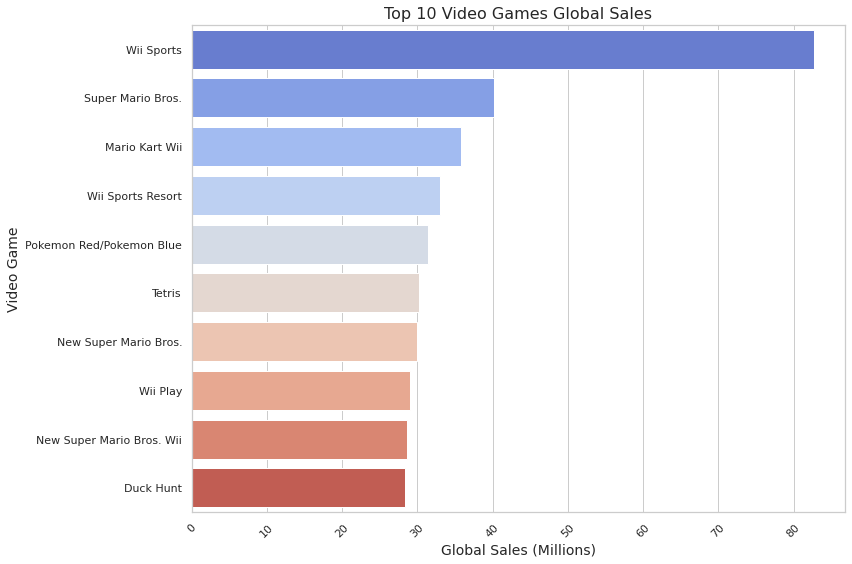

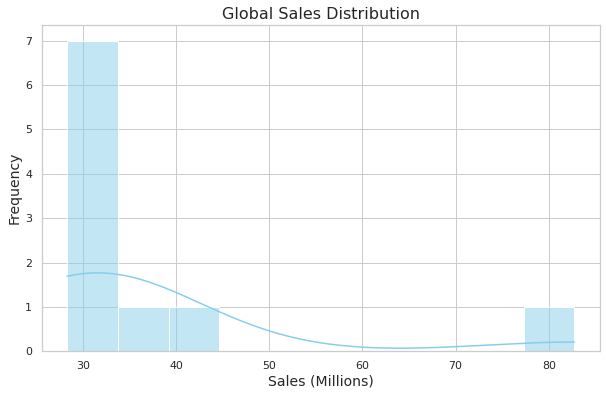

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

data_sorted = data.sort_values(by='Global_Sales', ascending=False)
global_top_10 = data_sorted[['Name', 'Global_Sales']].head(10)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x="Global_Sales", y="Name", data=global_top_10, palette="coolwarm")
plt.xlabel('Global Sales (Millions)', fontsize=14)
plt.ylabel('Video Game', fontsize=14)
plt.title('Top 10 Video Games Global Sales', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(global_top_10['Global_Sales'], bins=10, kde=True, color='skyblue')
plt.title('Global Sales Distribution', fontsize=16)
plt.xlabel('Sales (Millions)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

**3.显示欧洲销售的游戏中销量最大的10中游戏类型并进行饼图可视化**

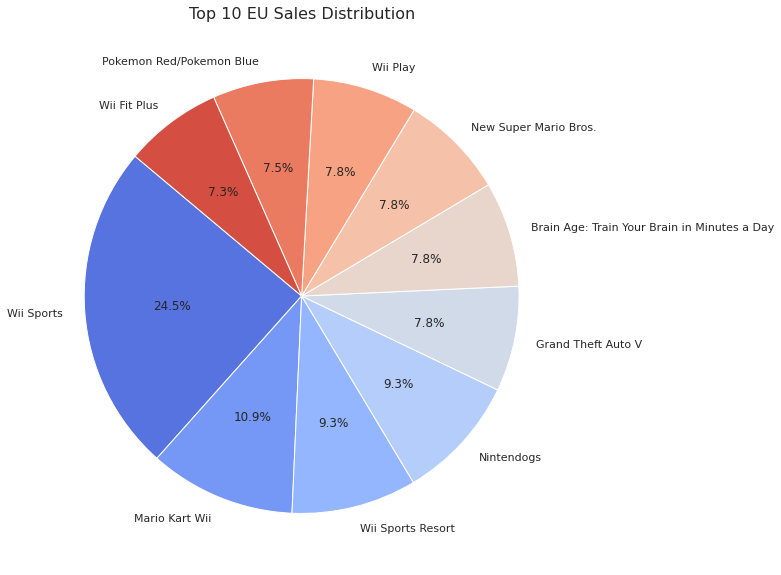

In [30]:
data_sorted = data.sort_values(by='EU_Sales', ascending=False)
eu_top_10 = data_sorted[['Name', 'EU_Sales']].head(10)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 10))
plt.pie(eu_top_10['EU_Sales'], labels=eu_top_10['Name'], autopct="%3.1f%%", startangle=140, colors=sns.color_palette("coolwarm", 10))
plt.title('Top 10 EU Sales Distribution', fontsize=16)
plt.show()

**4.分析任天堂公司从2000年到2015年的游戏销售情况（越详细越好）**

In [5]:
Nintendo_sale = data.loc[data['Publisher'] == 'Nintendo']
Nintendo_sale = Nintendo_sale[(1999 < Nintendo_sale['Year']) & (Nintendo_sale['Year'] < 2016)]

print(Nintendo_sale)

        Rank                                               Name Platform  \
0          1                                         Wii Sports      Wii   
2          3                                     Mario Kart Wii      Wii   
3          4                                  Wii Sports Resort      Wii   
6          7                              New Super Mario Bros.       DS   
7          8                                           Wii Play      Wii   
...      ...                                                ...      ...   
16269  16272                           Slide Adventure: Mag Kid       DS   
16357  16360               Mario vs. Donkey Kong: Tipping Stars     WiiU   
16456  16459                           Art Academy: Home Studio     WiiU   
16473  16476                                    Captain Rainbow      Wii   
16542  16545  Mario & Luigi: Paper Jam & Mario Kart 7 Double...      3DS   

         Year      Genre Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0     

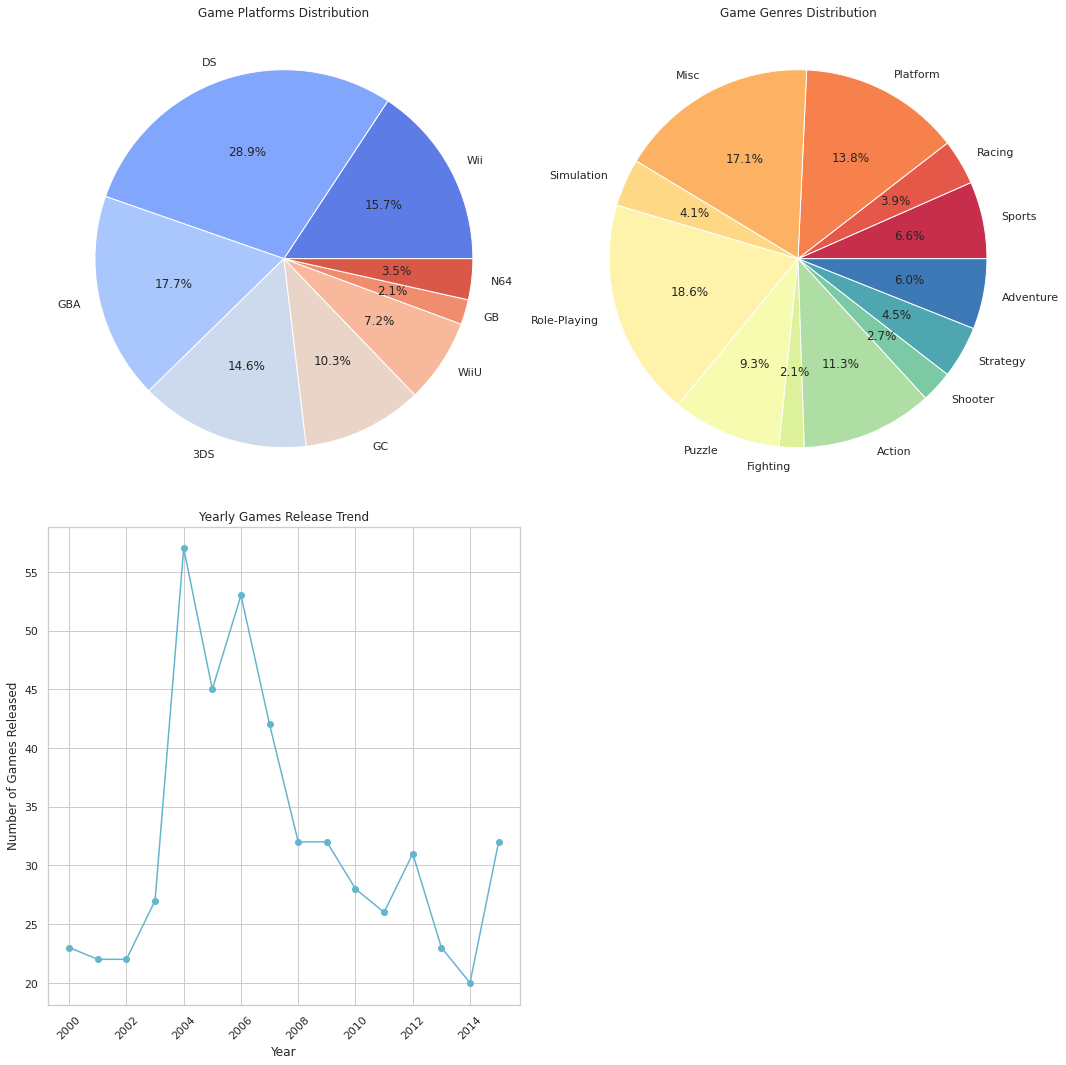

In [33]:
from collections import Counter

sns.set(style="whitegrid")

platforms = Counter(Nintendo_sale['Platform'])
genres = Counter(Nintendo_sale['Genre'])
years = Counter(Nintendo_sale['Year'])
years = dict(sorted(years.items(), key=lambda x: x[0]))

plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.pie(platforms.values(), labels=platforms.keys(), autopct="%3.1f%%", colors=sns.color_palette("coolwarm", len(platforms)))
plt.title('Game Platforms Distribution')

plt.subplot(2, 2, 2)
plt.pie(genres.values(), labels=genres.keys(), autopct="%3.1f%%", colors=sns.color_palette("Spectral", len(genres)))
plt.title('Game Genres Distribution')

plt.subplot(2, 2, 3)
plt.plot(list(years.keys()), list(years.values()), marker='o', linestyle='-', color='c')
plt.title('Yearly Games Release Trend')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

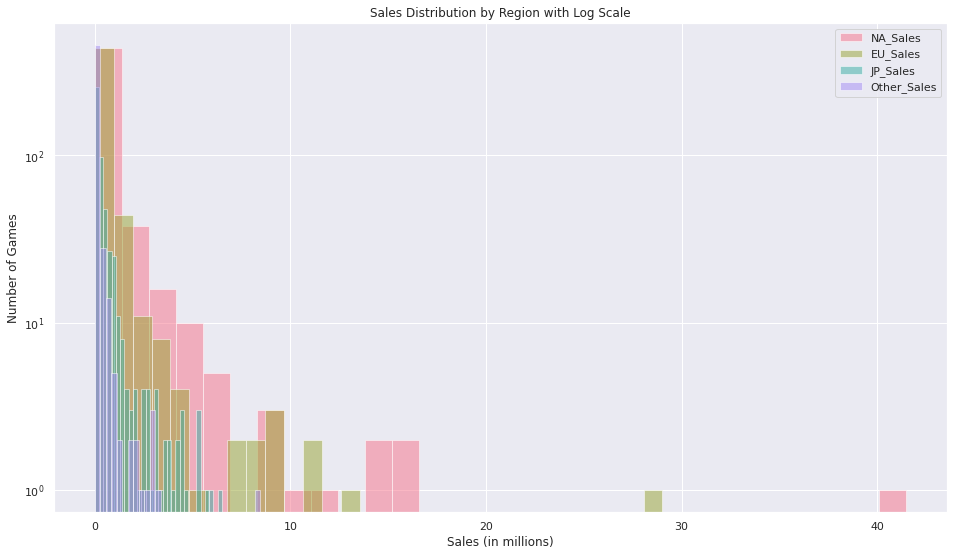

In [39]:
sns.set(style="darkgrid")

plt.figure(figsize=(16, 9))

plt.yscale('log')

NA_Sales = Nintendo_sale['NA_Sales']
NA_Sales.hist(alpha=0.5, bins=30, color=sns.color_palette("husl", 4)[0])
EU_Sales = Nintendo_sale['EU_Sales']
EU_Sales.hist(alpha=0.5, bins=30, color=sns.color_palette("husl", 4)[1])
JP_Sales = Nintendo_sale['JP_Sales']
JP_Sales.hist(alpha=0.5, bins=30, color=sns.color_palette("husl", 4)[2])
Other_Sales = Nintendo_sale['Other_Sales']
Other_Sales.hist(alpha=0.5, bins=30, color=sns.color_palette("husl", 4)[3])

plt.legend(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])

plt.title('Sales Distribution by Region with Log Scale')
plt.xlabel('Sales (in millions)')
plt.ylabel('Number of Games')

plt.show()